## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [ ]:
X.isnull().any()   # нет пропущеных значений, категориальных тоже нет

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
dtype: bool

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Сделаю Scale тут чтоб не делать это два раза далее(частичка 1.3 задания)
cols_to_scale = ['alcohol', 'magnesium']
X_to_scale = X[cols_to_scale]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_to_scale)

X_scaled_df = pd.DataFrame(X_scaled, columns=cols_to_scale)
X[cols_to_scale] = X_scaled_df

np.random.seed(41431)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
features = ['alcohol', 'magnesium']
results = []
classifiers = [] # создадим список для классификаторов
nn_neighbors = [1, 3, 5, 10, 15, 25]

for neighbors in nn_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbors, metric='euclidean')
    knn.fit(X_train[features], y_train)
    score_train = knn.score(X_train[features], y_train)
    score_test = knn.score(X_test[features], y_test)
    result = {'NN': neighbors, 'TRAIN': score_train, 'TEST': score_test}
    results.append(result)
    classifiers.append(knn) # сохраним классификаторы, чтобы не обучать их заного (1.5)

df = pd.DataFrame(results)
df

,NN,TRAIN,TEST
0,1,1.000000,0.611111
1,3,0.814516,0.703704
2,5,0.782258,0.648148
3,10,0.774194,0.685185
4,15,0.733871,0.666667
5,25,0.733871,0.666667


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [ ]:
!pip install mlxtend

In [ ]:
!pip install --upgrade matplotlib
!pip install --upgrade mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn import datasets
from sklearn.svm import SVC

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have v

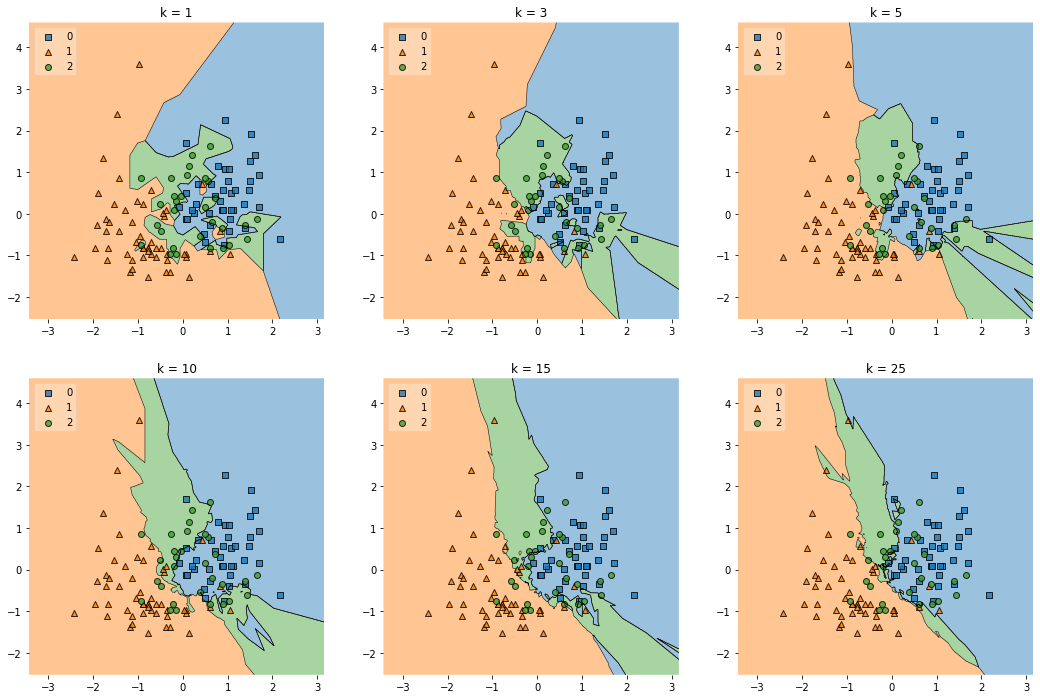

In [ ]:
gs = gridspec.GridSpec(2, 3)

X_train_arr = np.array(X_train[features])
y_train_arr = np.array(y_train)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.ravel()

for classifier, ax, neighbors in zip(classifiers, axes, nn_neighbors):
  ax.set_title('k = %d' % classifier.n_neighbors)
  ax.set_ylim(y_train_arr.min()-1, y_train_arr.max()+1)
  plot_decision_regions(X_train_arr, y_train_arr, clf=classifier, ax=ax, legend=2)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

В задаче 1.3 мы обучили несколько классификаторов, используя различное количество соседей, и оценили их производительность на тестовом наборе. Исходя из точности тестового набора, оптимальное число соседей оказалось равным 3, так как оно обеспечило наивысшую точность тестового набора 0.703704.

В задаче 1.5 мы визуализировали области принятия решений обученных классификаторов с помощью библиотеки mlxtend. Мы видим, что с увеличением числа соседей граница принятия решения становится более гладкой и менее склонной к перестройке. Однако, когда число соседей становится слишком большим, граница принятия решения становится слишком упрощенной и может не отражать сложную геометрию данных.

Поэтому, основываясь на точности тестового набора и визуализации границ принятия решений, мы можем сделать вывод, что оптимальное число соседей для обучения классификатора в данном случае равно 3. Это объясняется тем, что при этом достигается самая высокая точность тестового набора, а решаемая поверхность способна отразить сложную геометрию данных, избегая при этом чрезмерной подгонки.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

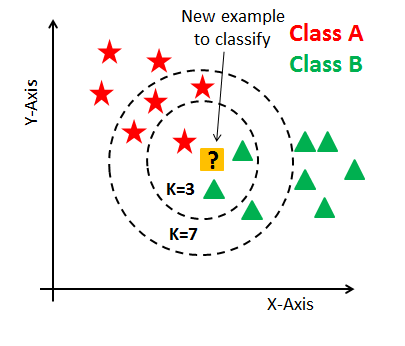

In [56]:
import numpy as np
from collections import Counter 

class KNN:
    def __init__(self, k:int):
        self.k = k
    
    def fit(self, X, y):
      self.X_train = X
      self.y_train = y
    
    def predict(self, X):
        if X.ndim == 1:
            X = X[np.newaxis, :]
        if self.X_train.ndim == 1:
            self.X_train = self.X_train[np.newaxis, :]
        dists = np.sum((self.X_train - X[:, np.newaxis])**2, axis=2) # Вычисляем евклидовы расстояния между тестовыми и обучающими данными
        idxs = np.argpartition(dists, self.k, axis=1)[:, :self.k] # Находим индексы k ближайших соседей
        labels = self.y_train[idxs] # Получение меток k ближайших соседей
        pred = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=labels) # Предсказываем метку, путем голосования
        return pred

In [35]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [55]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!mkdir -p ~/.kaggle
!cp "/content/drive/My Drive/kaggle.json" ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d shivam2503/diamonds && ls

  0% 0.00/733k [00:00<?, ?B/s]
100% 733k/733k [00:00<00:00, 75.4MB/s]
diamonds.zip  drive  sample_data


In [6]:
!ls

diamonds.zip  drive  sample_data


In [7]:
!unzip diamonds.zip

Archive:  diamonds.zip
  inflating: diamonds.csv            


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [12]:
data.isnull().any()

Unnamed: 0    False
carat         False
cut           False
color         False
clarity       False
depth         False
table         False
price         False
x             False
y             False
z             False
dtype: bool

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [13]:
data.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [14]:
constant_cols = [col for col in data.columns if data[col].nunique() == 1]
# Если столбец константа - он бессмысленный, проверяем количество уникальных значений в каждом столбце и чистим, те у которых кол-во уникальных значений = 1
if constant_cols:
    data.drop(columns=constant_cols, inplace=True)
data.drop(columns='Unnamed: 0', inplace = True) # решил удалить этот столбец, тк он не несет никакой нагрузки, кроме номера diamond'а
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [15]:
features = data.select_dtypes(include=['float', 'int']).columns.tolist()
corr_matrix = data.corr(method='pearson')
corr_matrix

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [16]:
categorian_features = data.select_dtypes(include=['object']).columns.tolist()
one_hot = pd.get_dummies(data[categorian_features])

data.drop(columns=categorian_features, axis=1, inplace = True)
data = pd.concat([data, one_hot], axis=1)
data

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [17]:
X = data.drop('price', axis = 1)
scaler = StandardScaler()
X_sc = scaler.fit_transform(X) # task 3.6

np.random.seed(22)
y = data.price
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [ ]:
#Чтобы не делать одно и то же два раза - масштабирую признаки до разделения выборки

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

prediction_train = lin_reg.predict(X_train)
prediction_test = lin_reg.predict(X_test)

mse_train = mean_squared_error(y_train, prediction_train)
mse_test = mean_squared_error(y_test, prediction_test)
print(f'mse on test: {mse_test}\nmse on train {mse_train}')

mse on test: 1225153.4730919667
mse on train 1299797.8739746455


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [20]:
pd.DataFrame({'feature': X.columns, 'coefficient': lin_reg.coef_})
# Видно, что по модулю самый выделяющийся коэффициент у feature "carat"

,feature,coefficient
0,carat,5.222855e+03
1,depth,-7.499172e+01
2,table,-5.774035e+01
3,x,-9.927582e+02
4,y,1.507286e+00
5,z,-6.362358e+01
6,cut_Fair,-1.803032e+13
7,cut_Good,-3.046684e+13
8,cut_Ideal,-5.189763e+13
9,cut_Premium,-4.622216e+13


**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [21]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [22]:
lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)

ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)

landr_coefs = pd.DataFrame({'feature': X.columns, 'lasso coefs': lasso.coef_, 'ridge coefs': ridge.coef_})
landr_coefs

,feature,lasso coefs,ridge coefs
0,carat,4769.081190,5187.042404
1,depth,-41.559538,-71.005913
2,table,-43.493322,-57.431136
3,x,-541.981531,-941.206243
4,y,-0.000000,0.946252
5,z,-80.184918,-80.059754
6,cut_Fair,-129.058306,-127.478868
7,cut_Good,-44.837225,-43.148120
8,cut_Ideal,41.019562,51.787566
9,cut_Premium,0.000000,17.632751


In [ ]:
# У нас достаточно высокий альфа коэффициент, что привело к сильному уменьшению весов
# Более наглядно видно после обучение с L2 регуляризатором, что уменьшились ряд параметров, это говорит нам о мультиколлинеарности признаков
# L1 уменьшает веса всех признаков, но не обязательно уменьшает влияние мультиколлинеарности
# наблюдая за весами признаков после регуляризации Лассо, можно сделать вывод о проявления мультиколлинеарности в исходной регрессии
# так же на основе корреляционной матрицы мы можем видеть, что существует высокая степень корреляции между независимыми переменными

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.490e+08, tolerance: 5.982e+07
  model = cd_fast.enet_coordinate_descent(


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

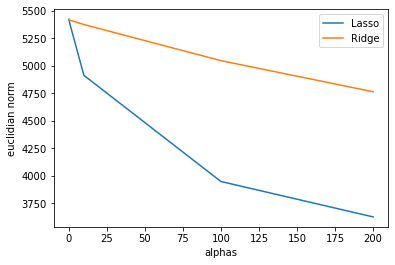

In [26]:
alphas = [0.1, 1, 10, 100, 200]

lasso_norms = []
ridge_norms = []

# lasso_norms = [np.linalg.norm(Lasso(alpha=alpha).fit(X_train, y_train).coef_) for alpha in alphas] - синоним к циклу, можно так, но я решил, что так код тяжело читается
# ridge_norms = [np.linalg.norm(Ridge(alpha=alpha).fit(X_train, y_train).coef_) for alpha in alphas]

for alpha in alphas:
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train, y_train)
  lasso_norms.append(np.linalg.norm(lasso.coef_))

  ridge = Ridge(alpha=alpha)
  ridge.fit(X_train, y_train)
  ridge_norms.append(np.linalg.norm(ridge.coef_))

plt.plot(alphas, lasso_norms, label='Lasso')
plt.plot(alphas, ridge_norms, label='Ridge')
plt.xlabel('alphas')
plt.ylabel('euclidian norm')
plt.legend()
plt

In [ ]:
# Регрессия Лассо имеет тенденцию уменьшать веса более агрессивно
# Lasso применяет штрафной коэффициент к абсолютному значению коэффициентов регрессионной модели
# Этот штрафной коэффициент поощряет меньшие коэффициенты и в результате может свести коэффициенты некоторых признаков к нулю
# Это означает, что Лассо может определить наиболее важные признаки, отбрасывая менее важные, тем самым упрощая модель и снижая риск перебора.
# Лассо может быть использована для решения проблемы мультиколлинеарности
# Лассо может выбрать один признак из группы высококоррелированных признаков, уменьшив при этом коэффициенты других признаков до нуля

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [24]:
from sklearn.linear_model import LassoCV

In [27]:
lassoCV = LassoCV(alphas=alphas, cv=5)
lassoCV.fit(X_train, y_train)
avg_errors = np.mean(lassoCV.mse_path_, axis=1)
print(pd.DataFrame(avg_errors))
best_alpha = lassoCV.alphas_[np.argmin(avg_errors)]
print('best alpha:', best_alpha)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1506335087.9556084, tolerance: 47918605.7133176
  model = cd_fast.enet_coordinate_descent_gram(


              0
0  1.960860e+06
1  1.543319e+06
2  1.313485e+06
3  1.303204e+06
4  1.308889e+06
best alpha: 1.0


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [31]:
lasso_ba = Lasso(alpha = best_alpha)
lasso_ba.fit(X_train, y_train)

coefs_lasso_ba = pd.DataFrame({'feature': X.columns, 'coefficient': lasso_ba.coef_})
coefs_lasso_ba
# Наиболее информативным оказался коэффициент feature 'carat', и действительно в реальной жизни карат решает стоимость брилианта, 
# некоторые коэффициенты занулились/приблизились к нулю, тк модель выявила кореляцию этих фич с другими

,feature,coefficient
0,carat,5177.316517
1,depth,-71.400956
2,table,-56.329249
3,x,-944.026659
4,y,-0.000000
5,z,-67.335432
6,cut_Fair,-133.672864
7,cut_Good,-53.660525
8,cut_Ideal,32.939767
9,cut_Premium,0.000000


**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [29]:
prediction_ba = lasso_ba.predict(X_test)
mse_test_ba = mean_squared_error(y_test, prediction_ba)
print("Разница среднеквадратических ошибок у модели с лучшим альфа коэффициентом и линейной регрессии:", mse_test_ba - mse_test)
# оказалось, что для предсказаний лучше использовать модель из задания 3.7, тк на ней ошибка меньше, я предполагаю, что у нас существует очень
# большая ошибка в один момент, что на первом наборе что на втором наборе весов, но во втором случае эта ошибка на порядок поменьше и из-за 
# этого вторая модель лучше, чем та которая обучалась с лучшим альфа коэффициентом.

Разница среднеквадратических ошибок у модели с лучшим альфа коэффициентом и линейной регрессии: 1609.6805517191533
